In [30]:
##### setting
### set filename you want to analysis
filepath = None

if filepath == None:
    import os
    import smooziee
    filepath = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GX711_p0p25_RT_4')
    
filename = os.path.basename(filepath)


In [31]:
##### import
# from smooziee.smooziee.fitting import Fitting
# from smooziee.smooziee.peak_search import PeakSearch
from smooziee.smooziee import fitting
from smooziee.smooziee import peak_search
import imp
imp.reload(fitting)
imp.reload(peak_search)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lmfit


In [32]:
import pickle
with open('pksearch.pickle', 'rb') as f:
    processor = pickle.load(f) 

print(processor.x.shape)
print(processor.y.shape)
print(processor.ix_peaks)
print(processor.ix_peak_pairs)

(73,)
(73,)
[7, 15, 21, 28, 36, 47, 55]
[[7, 36], [15, 28]]


In [33]:
fit = fitting.Fitting(['lorentzian' for i in range(len(processor.ix_peaks))])
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1     -inf      inf     None     True     None     None
l0_center            0     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None     True     None     None
l1_amplitude         1     -inf      inf     None     True     None     None
l1_center            0     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1        0      inf     None     True     None     None
l2_amplitude         1     -inf      inf     None     True 

In [43]:
fit.set_params_expr(processor.ix_peaks, processor.ix_peak_pairs, param_names=['sigma', 'amplitude'])

In [44]:
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1     -inf      inf     None     True     None     None
l0_center            0     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None    False     None     None
l1_amplitude         1     -inf      inf     None     True     None     None
l1_center            0     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1        0      inf     None     True     None     None
l2_amplitude         1     -inf      inf     None     True 

In [45]:
fit.set_params_vary([0, 6], ['sigma'], vary=False)

In [46]:
fit.params.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
l0_amplitude         1     -inf      inf     None     True     None     None
l0_center            0     -inf      inf     None     True     None     None
l0_fwhm              2     -inf      inf     None    False 2.0000000*l0_sigma     None
l0_height       0.3183     -inf      inf     None    False 0.3183099*l0_amplitude/max(1.e-15, l0_sigma)     None
l0_sigma             1        0      inf     None    False     None     None
l1_amplitude         1     -inf      inf     None     True     None     None
l1_center            0     -inf      inf     None     True     None     None
l1_fwhm              2     -inf      inf     None    False 2.0000000*l1_sigma     None
l1_height       0.3183     -inf      inf     None    False 0.3183099*l1_amplitude/max(1.e-15, l1_sigma)     None
l1_sigma             1        0      inf     None     True     None     None
l2_amplitude         1     -inf      inf     None     True 

In [47]:
fit.fit(processor.x, processor.y)

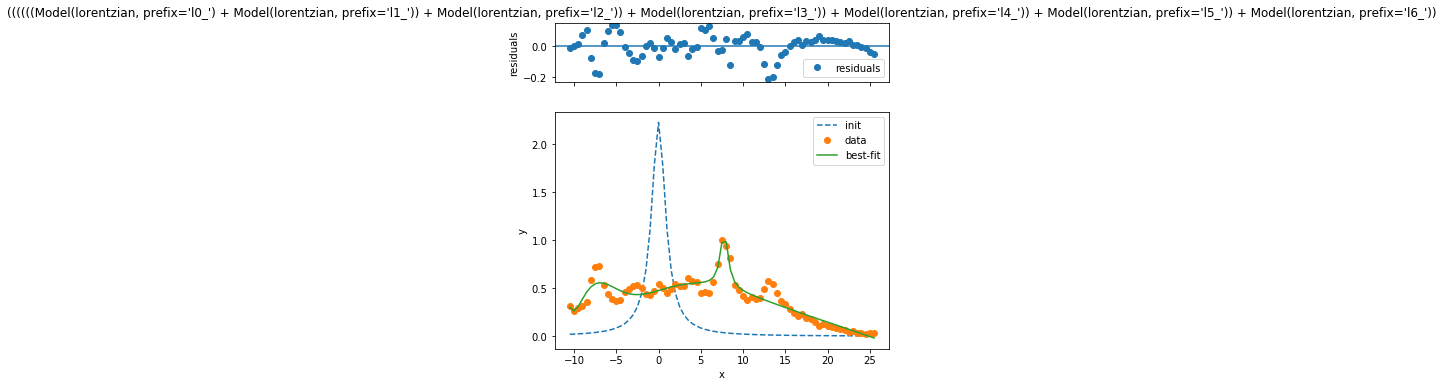

In [49]:
fit.plot(show_init=True)

In [40]:
fit.result.eval_components()

OrderedDict([('l0_',
              array([-0.0017207 , -0.00171066, -0.0017007 , -0.00169083, -0.00168104,
                     -0.00167134, -0.00166173, -0.00165219, -0.00164274, -0.00163337,
                     -0.00162408, -0.00161486, -0.00160573, -0.00159667, -0.00158769,
                     -0.00157879, -0.00156996, -0.0015612 , -0.00155252, -0.0015439 ,
                     -0.00153536, -0.0015269 , -0.0015185 , -0.00151017, -0.0015019 ,
                     -0.00149371, -0.00148558, -0.00147752, -0.00146953, -0.00146159,
                     -0.00145373, -0.00144592, -0.00143818, -0.0014305 , -0.00142289,
                     -0.00141533, -0.00140783, -0.0014004 , -0.00139302, -0.0013857 ,
                     -0.00137843, -0.00137123, -0.00136408, -0.00135698, -0.00134995,
                     -0.00134296, -0.00133603, -0.00132915, -0.00132233, -0.00131556,
                     -0.00130884, -0.00130217, -0.00129556, -0.00128899, -0.00128247,
                     -0.001276  ,